<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data loading</a></span><ul class="toc-item"><li><span><a href="#Uploading-information-from-the-airbnb-database" data-toc-modified-id="Uploading-information-from-the-airbnb-database-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Uploading information from the airbnb database</a></span></li><li><span><a href="#Loading-of-information-from-other-information-sources" data-toc-modified-id="Loading-of-information-from-other-information-sources-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Loading of information from other information sources</a></span></li></ul></li><li><span><a href="#Data-quality" data-toc-modified-id="Data-quality-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data quality</a></span><ul class="toc-item"><li><span><a href="#Listings-table" data-toc-modified-id="Listings-table-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Listings table</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Variables-y-types" data-toc-modified-id="Variables-y-types-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Variables y types</a></span></li><li><span><a href="#Analysis-of-nulls" data-toc-modified-id="Analysis-of-nulls-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>Analysis of nulls</a></span></li><li><span><a href="#Análisis-de-duplicados" data-toc-modified-id="Análisis-de-duplicados-1.3.1.4"><span class="toc-item-num">1.3.1.4&nbsp;&nbsp;</span>Análisis de duplicados</a></span></li><li><span><a href="#Analysis-of-categorical-variables" data-toc-modified-id="Analysis-of-categorical-variables-1.3.1.5"><span class="toc-item-num">1.3.1.5&nbsp;&nbsp;</span>Analysis of categorical variables</a></span></li><li><span><a href="#Numercical-variable-analysis" data-toc-modified-id="Numercical-variable-analysis-1.3.1.6"><span class="toc-item-num">1.3.1.6&nbsp;&nbsp;</span>Numercical variable analysis</a></span></li></ul></li><li><span><a href="#Tabla-lisitings_detailed" data-toc-modified-id="Tabla-lisitings_detailed-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Tabla lisitings_detailed</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Types-and-variables" data-toc-modified-id="Types-and-variables-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Types and variables</a></span></li><li><span><a href="#Analysis-of-nulls" data-toc-modified-id="Analysis-of-nulls-1.3.2.3"><span class="toc-item-num">1.3.2.3&nbsp;&nbsp;</span>Analysis of nulls</a></span></li><li><span><a href="#Duplicate-analysis" data-toc-modified-id="Duplicate-analysis-1.3.2.4"><span class="toc-item-num">1.3.2.4&nbsp;&nbsp;</span>Duplicate analysis</a></span></li><li><span><a href="#Analysis-of-categorical-variables" data-toc-modified-id="Analysis-of-categorical-variables-1.3.2.5"><span class="toc-item-num">1.3.2.5&nbsp;&nbsp;</span>Analysis of categorical variables</a></span></li><li><span><a href="#Analysis-of-numerical-variables" data-toc-modified-id="Analysis-of-numerical-variables-1.3.2.6"><span class="toc-item-num">1.3.2.6&nbsp;&nbsp;</span>Analysis of numerical variables</a></span></li></ul></li></ul></li><li><span><a href="#Creating-the-Analytical-Datamart" data-toc-modified-id="Creating-the-Analytical-Datamart-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creating the Analytical Datamart</a></span></li><li><span><a href="#Saving-to-a-database" data-toc-modified-id="Saving-to-a-database-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Saving to a database</a></span></li></ul></li></ul></div>

# Data cleaning

## Set up

In [1]:
# Importamos los paquetes que vamos a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy = True

## Data loading

### Uploading information from the airbnb database

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

In [3]:
from sqlalchemy import inspect
insp = inspect(con)
tables = insp.get_table_names()
tables

['listings', 'listings_detailed']

In [4]:
listings = pd.read_sql('listings', con)
listings_detailed = pd.read_sql('listings_detailed', con)

In [5]:
#Checking how many columns and rows each table has
for table_name in tables:
    print(table_name + ': ' + str(eval(table_name).shape ))

listings: (18909, 19)
listings_detailed: (18909, 75)


### Loading of information from other information sources

Within the business levers we find the price of housing, however we do not have this information in the data provided by Aribnb. To obtain this information we will use data from IDEALISTA (https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/ ) which has information related to prices per m2 per neighborhood for Madrid.

In [6]:
price_m2 = pd.read_csv('../Datos/idealista.csv') \
    .loc[1:, ['table__cell','icon-elbow']] \
    .rename(columns = {'table__cell':'precio_m2', 'icon-elbow':'distrito'})
    

In [7]:
price_m2.head()

,precio_m2,distrito
1,4.085 €/m2,Arganzuela
2,3.409 €/m2,Barajas
3,2.123 €/m2,Carabanchel
4,4.827 €/m2,Centro
5,5.098 €/m2,Chamartín


In [8]:
price_m2['precio_m2'] = price_m2['precio_m2'].str.split(expand = True)[0].str.replace('.','',regex=False).astype('int')
price_m2.head()

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín


In [9]:
price_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int32 
 1   distrito   21 non-null     object
dtypes: int32(1), object(1)
memory usage: 384.0+ bytes


## Data quality

### Listings table

#### Overview

In [10]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.21,2,180,4,None
1,1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.39,2,364,0,None
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,None,NaN,5,222,0,None
3,3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,None
4,4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2018-05-15,1.65,1,349,0,None


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           18909 non-null  int64  
 1   id                              18909 non-null  int64  
 2   name                            18906 non-null  object 
 3   host_id                         18909 non-null  int64  
 4   host_name                       18883 non-null  object 
 5   neighbourhood_group             18909 non-null  object 
 6   neighbourhood                   18909 non-null  object 
 7   latitude                        18909 non-null  float64
 8   longitude                       18909 non-null  float64
 9   room_type                       18909 non-null  object 
 10  price                           18909 non-null  int64  
 11  minimum_nights                  18909 non-null  int64  
 12  number_of_reviews               

#### Variables y types

After identifying the variables that are not of interest for our analysis, we proceed to eliminate these records.


In [12]:
to_delete = ['index',
              'host_name',
              'number_of_reviews',
              'last_review',
              'reviews_per_month',
              'number_of_reviews_ltm',
              'license'
             ]

listings.drop(columns = to_delete, inplace = True)
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


We check the types of variables.

In [13]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   neighbourhood_group             18909 non-null  object 
 4   neighbourhood                   18909 non-null  object 
 5   latitude                        18909 non-null  float64
 6   longitude                       18909 non-null  float64
 7   room_type                       18909 non-null  object 
 8   price                           18909 non-null  int64  
 9   minimum_nights                  18909 non-null  int64  
 10  calculated_host_listings_count  18909 non-null  int64  
 11  availability_365                18909 non-null  int64  
dtypes: float64(2), int64(6), object(

We convert the type of three variables ('neighbourhood_group', 'neighbourhood', 'room_type')  to categorical type.

In [14]:
for variable in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    listings[variable] = listings[variable].astype('category')

#### Analysis of nulls

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

In [19]:
listings[listings['name'].isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,None,37525983,Centro,Palacio,40.41458,-3.71422,Private room,30,1,1,0
2394,11687495,None,48387429,San Blas - Canillejas,Simancas,40.43765,-3.62672,Entire home/apt,50,1,1,0
2842,13585476,None,20922102,Centro,Universidad,40.42718,-3.71144,Entire home/apt,65,3,1,0


From the Non-null column of the info() we see that only name has 3 nulls.

We check them but we see that it is not a problem, so we leave them.

#### Análisis de duplicados

In [20]:
listings.duplicated().sum()

0

We dont find duplicates registers

####  Analysis of categorical variables

In [21]:
listings['neighbourhood_group'].value_counts()

Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: neighbourhood_group, dtype: int64

In [22]:
listings['neighbourhood'].value_counts()

Embajadores    2255
Universidad    1772
Palacio        1533
Sol            1126
Justicia        910
               ... 
El Plantío        5
Valdemarín        4
El Pardo          3
Horcajo           2
Atalaya           1
Name: neighbourhood, Length: 128, dtype: int64

In [23]:
listings['room_type'].value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: room_type, dtype: int64

We see hotels in the data. Our company doesn't consider buying hotel so we delete these registers.

In [24]:
listings = listings.loc[listings['room_type'] != 'Hotel room']
listings.shape

(18746, 12)

#### Numercical variable analysis

In [25]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18746 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18746 non-null  int64   
 1   name                            18743 non-null  object  
 2   host_id                         18746 non-null  int64   
 3   neighbourhood_group             18746 non-null  category
 4   neighbourhood                   18746 non-null  category
 5   latitude                        18746 non-null  float64 
 6   longitude                       18746 non-null  float64 
 7   room_type                       18746 non-null  category
 8   price                           18746 non-null  int64   
 9   minimum_nights                  18746 non-null  int64   
 10  calculated_host_listings_count  18746 non-null  int64   
 11  availability_365                18746 non-null  int64   
dtypes: category(3), fl

Select the four columns with the information to be analyzed

In [26]:
listings.iloc[: , 8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,18746.0,129.271365,432.384680,8.0,36.0,64.0,105.0,9999.0
minimum_nights,18746.0,7.295850,35.430022,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,18746.0,10.731676,26.429455,1.0,1.0,2.0,6.0,194.0
availability_365,18746.0,153.761656,140.363063,0.0,0.0,113.0,310.0,365.0


Conclusions:

* In the price we have to check the minimum and maximum values. It is rare to find rooms in madrid for 8 euros and others for 1000 euros.
* In the variable minimum_nights we have to check the minimum values. It is rare to find a minimum time to rent for almost 3 yers.
* In the variable  calculated_host_listings_count we have to check the maximum values. 

##### Price

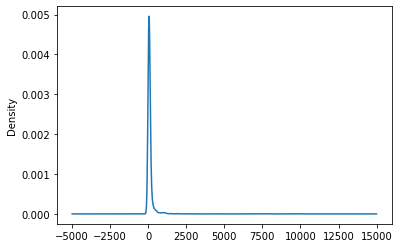

In [27]:
listings['price'].plot.kde();

We see that most of the data is apparently concentrated between 0 and 300, but we have some tails in the distribution that show outliers with prices per night above 1000 euros.

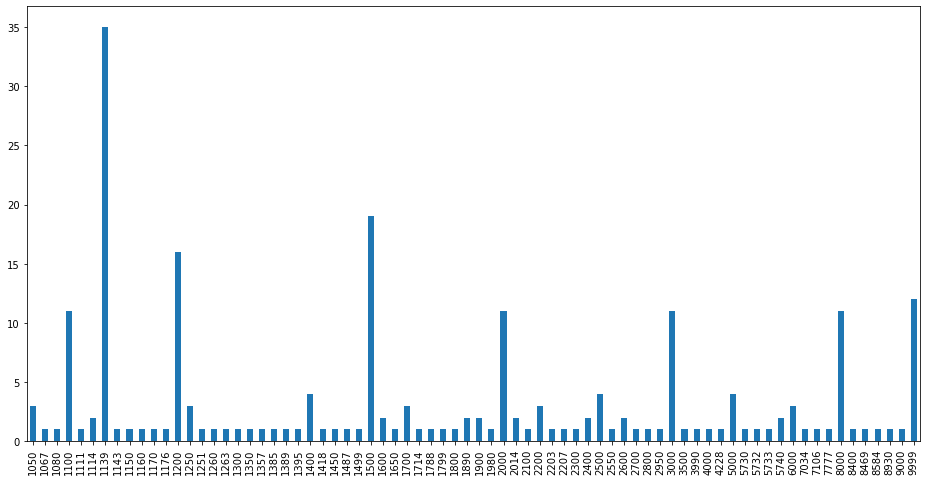

In [28]:
plt.figure(figsize = (16,8))
listings['price'].loc[listings['price'] > 1000].value_counts().sort_index().plot.bar();
plt.xticks(size = 10);

Conclusion: 
    
* the value 9999 is usually a way to impute nulls, but in this case its frequency is not very far from other values that can be valid, such as 8000, so we are not going to touch it.

Checking values close to 0.

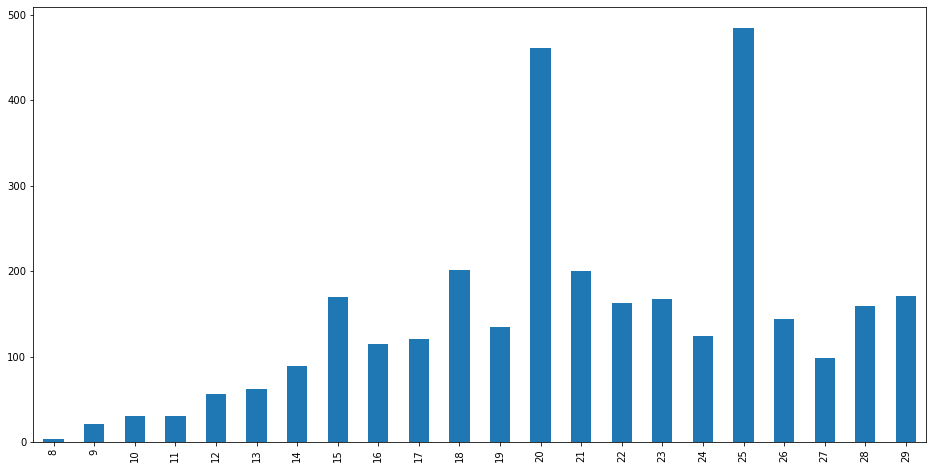

In [29]:
plt.figure(figsize = (16,8))
listings['price'].loc[listings['price'] < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

Conclusion: 
    
* There is a peak at 20 euros, and it seems that below that amount it would be difficult to obtain profitability considering that we are in Madrid, so let's discard the properties that are rented below 20 euros.

*DISCLAIMER = Removing the records that have rental price per night below 20 euros, does not strictly obey a deep analysis, I do it more as an excuse to practice the elimination of records.*



In [30]:
listings = listings.loc[listings['price'] > 19]
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


##### minimum nights

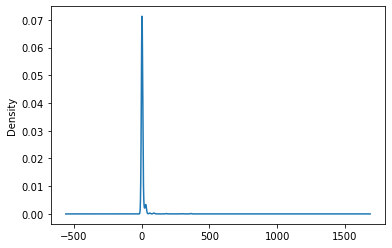

In [31]:
listings['minimum_nights'].plot.kde();

As expected the largest amount of data related to the minimum number of nights is found in one night. In the airbnb dataset it is possible to find outliers on both sides.

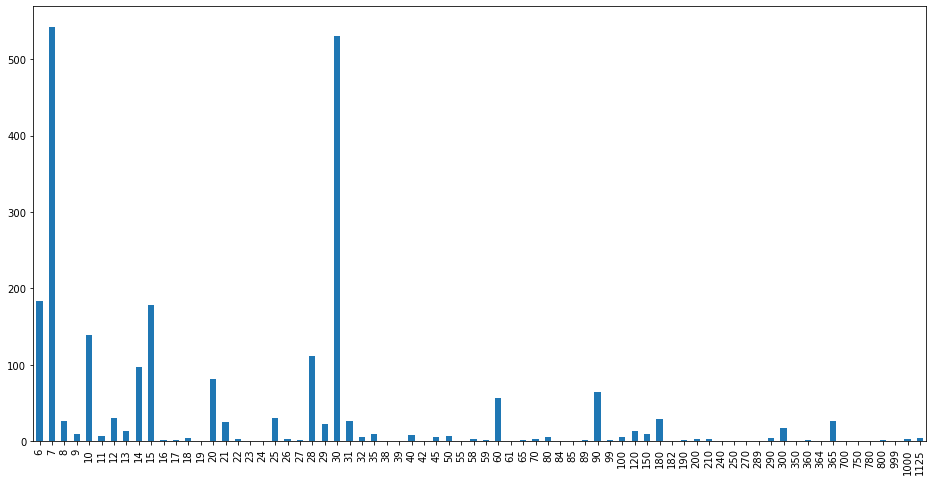

In [32]:
plt.figure(figsize = (16,8))
listings['minimum_nights'].loc[listings['minimum_nights'] > 5].value_counts().sort_index().plot.bar();
plt.xticks(size = 10);

Although I initially thought that all apartments would be rented for a minimum of 1 day, it can be observed that some apartments are rented for a minimum of a week and others for a month. The more extreme values could be errors in the dataset.

The same analysis is performed for the variables ['calculated_host_listings_count ', 'availability_365'].

### Tabla lisitings_detailed

#### Overview

In [33]:
listings_detailed.head()

,index,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,None,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.89,4.77,4.85,None,f,2,0,2,0,1.21
1,1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,None,f,2,0,2,0,0.39
2,2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,...,NaN,NaN,NaN,None,f,5,4,1,0,NaN
3,3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.83,None,f,1,1,0,0,0.51
4,4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.71,4.70,4.72,None,f,1,0,1,0,1.65


In [34]:
listings_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18909 non-null  int64  
 1   id                                            18909 non-null  int64  
 2   listing_url                                   18909 non-null  object 
 3   scrape_id                                     18909 non-null  int64  
 4   last_scraped                                  18909 non-null  object 
 5   name                                          18906 non-null  object 
 6   description                                   17854 non-null  object 
 7   neighborhood_overview                         10997 non-null  object 
 8   picture_url                                   18908 non-null  object 
 9   host_id                                       18909 non-null 

#### Types and variables

We will select only those variables that provide us with information relevant to our objectives.

In [35]:
to_add = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]
listings_detailed = listings_detailed.loc[:, to_add]
listings_detailed.head()

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,NaN,1.0,1.0,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,NaN,1.0,1.0,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,NaN,3.0,5.0,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,NaN,NaN,1.0,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,NaN,1.0,1.0,149,4.68,4.71,4.70


We analyze the types of variables

In [36]:
listings_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     17475 non-null  float64
 6   beds                         18568 non-null  float64
 7   number_of_reviews            18909 non-null  int64  
 8   review_scores_rating         13877 non-null  float64
 9   review_scores_communication  13640 non-null  float64
 10  review_scores_location       13637 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ MB


In [37]:
listings_detailed['host_is_superhost'] = listings_detailed['host_is_superhost'].astype('category')
listings_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     17475 non-null  float64 
 6   beds                         18568 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


#### Analysis of nulls

In [38]:
listings_detailed.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                             341
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

Conclusions:

* bathrooms is totally null, so we eliminate it.
* description has no nulls, so we leave it (we can't impute it by another value)
* host_is_superhost has very few nulls and is not a super relevant variable, so we leave it.
* beds: we can try to impute it from accomodates
* bedrooms is an important variable for us, we can try to impute the nulls through proxies like accomodates or beds



Let's see if we can make an allocation of beds based on the number of people that can be accommodated (accomodates).

In [39]:
pd.crosstab(listings_detailed['beds'], listings_detailed['accommodates'])

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.0,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.0,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.0,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.0,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.0,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.0,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.0,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.0,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


It seems that we could make a more or less direct assignment. Reading the matrix vertically we see that:

* one or two persons usually corresponds to one bed
* three or four people usually correspond to two beds
* five or six people usually correspond to three beds
* more than 6 persons will be assigned four beds

In [40]:
listings_detailed['beds'].value_counts(dropna = False)

1.0     8751
2.0     4805
3.0     2272
4.0     1186
0.0      628
5.0      466
NaN      341
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

We create a function to impute the nulls of beds on the basis of accommodates.

In [41]:
def impute_null(register):
    # This function impute the null registers of beds with the values that we dettect in the relation between Accommodates and beds.
    #list of conditions
    
    conditions = [(register['accommodates'] <= 2), 
                 (register['accommodates'] > 2) & (register['accommodates'] <= 4),
                 (register['accommodates'] > 4) & (register['accommodates'] <= 6),
                 (register['accommodates'] > 6)]
    
    # List of results
    results = [1,2,3,4]
    #output
    return (np.select(conditions, results, default = -999))

listings_detailed.loc[listings_detailed['beds'].isnull(), 'beds'] = listings_detailed.loc[listings_detailed['beds'].isnull()].apply(impute_null, axis = 1).astype('int64')
    

In [42]:
listings_detailed['beds'].value_counts(dropna = False)

1.0     9061
2.0     4828
3.0     2276
4.0     1190
0.0      628
5.0      466
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

Now let's see if we can do a bedroom allocation.

We start by crossing the number of rooms with the number of people that can be accommodated.

In [43]:
pd.crosstab(listings_detailed['bedrooms'], listings_detailed['beds'])

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,23.0,24.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.0,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.0,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.0,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.0,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.0,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
def impute_bedrooms_null(registro):
    #List of conditions
    conditions = [(registro.beds <= 2),
               (registro.beds > 2) & (registro.beds <= 4),
               (registro.beds > 4) & (registro.beds <= 6),
               (registro.beds > 6)]

    #List of results
    results = [1,2,3,4]
    
    #Output
    return(np.select(conditions,results, default = -999))

#ImputationComprobamos
listings_detailed.loc[listings_detailed.bedrooms.isna(),'bedrooms'] = listings_detailed.loc[listings_detailed.bedrooms.isna()].apply(impute_bedrooms_null , axis = 1).astype('float64')

We check

In [45]:
listings_detailed['bedrooms'].value_counts()

1.0     13540
2.0      3657
3.0      1244
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

Finally we will delete bathrooms that do not have any data

In [46]:
listings_detailed.drop(columns = 'bathrooms', inplace = True)
listings_detailed.head()

,id,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70


#### Duplicate analysis

In [47]:
listings_detailed.duplicated().sum()

0

#### Analysis of categorical variables

In [48]:
listings_detailed['host_is_superhost'].value_counts()

f    15423
t     3460
Name: host_is_superhost, dtype: int64

This variable is not of interest for our analysis, we do not know very well what it represents.

#### Analysis of numerical variables

In [49]:
listings_detailed.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,18909.0,3.055841e+07,1.448889e+07,6369.0,19305558.00,33537761.00,42555334.00,52182334.0
accommodates,18909.0,3.094928e+00,1.963715e+00,0.0,2.00,2.00,4.00,16.0
bedrooms,18909.0,1.414670e+00,8.116969e-01,1.0,1.00,1.00,2.00,18.0
beds,18909.0,1.909197e+00,1.444317e+00,0.0,1.00,1.00,2.00,24.0
number_of_reviews,18909.0,3.270612e+01,6.524996e+01,0.0,0.00,5.00,32.00,744.0
review_scores_rating,13877.0,4.549404e+00,7.834379e-01,0.0,4.50,4.75,4.94,5.0
review_scores_communication,13640.0,4.776612e+00,4.632929e-01,1.0,4.75,4.92,5.00,5.0
review_scores_location,13637.0,4.788151e+00,3.774844e-01,1.0,4.73,4.92,5.00,5.0


We do not see anything strange.
At this point we have already detected and corrected the main data quality problems so we move on to create the analytical datamart integrating our tables.

## Creating the Analytical Datamart

Now we are going to join the two main tables we have. We join the detail table to the main table by the id identifier.

In [50]:
df = pd.merge(left =listings, right = listings_detailed, how = 'left', on = 'id')
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,...,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,...,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,...,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,...,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,...,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70


Now we add to the price table metro_2

In [51]:
price_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int32 
 1   distrito   21 non-null     object
dtypes: int32(1), object(1)
memory usage: 384.0+ bytes


In order to join the two tables we verify that the join field is written exactly the same in both tables.

In [52]:
price_m2['distrito'].unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina',
       'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro',
       'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde'], dtype=object)

In [53]:
df['neighbourhood_group'].unique().categories

Index(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype='object')

We detected that the following fields are different between tables:
* Fuencarral - El Pardo
* Moncloa - Aravaca
* San Blas - Canillejas

To solve it we replace the different values inside the price_m2 table.

In [54]:
price_m2['distrito'] = price_m2['distrito'].map({'Fuencarral':'Fuencarral - El Pardo',
                                                'Moncloa':'Moncloa - Aravaca',
                                                'San Blas':'San Blas - Canillejas'}) \
                                            .fillna(price_m2['distrito'])
price_m2

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral - El Pardo
9,3871,Hortaleza
10,2267,Latina


Ahora si unimos las dos tablas.

In [55]:
df = pd.merge(left = df, right = price_m2, how = 'left', left_on = 'neighbourhood_group', right_on = 'distrito' )
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,...,f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela


A null check is performed to verify that no problems were generated at the junction.

In [56]:
df['price'].isna().sum()

0

## Saving to a database

Now that we have the analysis board we will save it in the database so that every time we want to do analysis we do not have to repeat all the processing of this notebook.

In [57]:
df.to_sql('df', con = con, if_exists = 'replace')

In [58]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,...,f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,6114,Salamanca
